# **<center>Fundamentos de Ciência de Dados e Inteligência de Negócios</center>**

Unimar, Marilia-SP

**Larissa e Luiz Fernando**


📚 **IMPORTAÇÕES**

In [716]:
import os
import kagglehub
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



🎲 **COLETA DE DADOS**



In [717]:
path = kagglehub.dataset_download("asinow/airplane-price-dataset")
print("Path to dataset files:", path)
file = os.listdir(path)

Path to dataset files: /home/larissa/.cache/kagglehub/datasets/asinow/airplane-price-dataset/versions/1


📜 **LER DADOS**

In [718]:
csv = [f for f in file if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv))
df.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


⚙️ **PROCESSAMENTO DE DADOS**

O processamento de dados é importante para que a análise dos dados tenha mais fluidez e acertividade no momento da empresa analisar os dados. Logo, limpar, transformar e preparar os dados para análise é totalmente bem vindo, se necessário, assim muitas vezes tornamos dados confusos em dados que nos permitem utiliza-los e criar insights significativos.

👁️‍🗨️ **ANALISE**

In [719]:
df.describe()

,Üretim Yılı,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
count,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,1.237700e+04
mean,2001.477660,1.835259,190.413994,7782.210148,12.075615,2744.089599,21.522340,1.988336e+08
std,12.766785,0.370962,142.662710,5492.478746,9.905418,1293.209611,12.766785,2.290392e+08
min,1980.000000,1.000000,4.000000,1285.000000,2.000000,500.020000,0.000000,1.458148e+05
25%,1990.000000,2.000000,50.000000,3000.000000,5.950000,1627.260000,10.000000,1.409681e+07
50%,2001.000000,2.000000,162.000000,5700.000000,9.820000,2744.330000,22.000000,8.392191e+07
75%,2013.000000,2.000000,350.000000,14800.000000,13.470000,3848.840000,33.000000,3.843239e+08
max,2023.000000,2.000000,396.000000,15600.000000,49.970000,4999.660000,43.000000,9.782132e+08


In [720]:
df.isna().sum()

Model                         0
Üretim Yılı                   0
Motor Sayısı                  0
Motor Türü                    0
Kapasite                      0
Menzil (km)                   0
Yakıt Tüketimi (L/saat)       0
Saatlik Bakım Maliyeti ($)    0
Yaş                           0
Satış Bölgesi                 0
Fiyat ($)                     0
dtype: int64

💊 **TRATAMENTO DE DADOS**

In [721]:
def read_and_rename(path, csv):
    df = pd.read_csv(os.path.join(path,csv))
    df.rename(columns={'Model':'modelo',
                    'Üretim Yılı':'ano_fabricacao',
                    'Motor Sayısı':'qtde_motores',
                    'Motor Türü':'tipo_motor',
                    'Kapasite':'capacidade',
                    'Menzil (km)':'alcance_km',
                    'Yakıt Tüketimi (L/saat)':'consumo_combustivel_por_hora',
                    'Saatlik Bakım Maliyeti ($)': 'custo_manutencao_por_hora',
                    'Yaş':'idade',
                    'Satış Bölgesi':'regiao_venda',
                    'Fiyat ($)':'preco'},inplace=True)
    return df
df = read_and_rename(path,csv)

In [722]:
#limpeza de idade da aeronave
df = df.drop("idade", axis=1)

In [723]:
df.columns

Index(['modelo', 'ano_fabricacao', 'qtde_motores', 'tipo_motor', 'capacidade',
       'alcance_km', 'consumo_combustivel_por_hora',
       'custo_manutencao_por_hora', 'regiao_venda', 'preco'],
      dtype='object')

In [724]:
df["ano_fabricacao"].value_counts(normalize=True)
df["modelo"].value_counts().sort_index().head()

modelo
Airbus A320          2048
Airbus A350          2107
Boeing 737           2121
Boeing 777           2011
Bombardier CRJ200    2051
Name: count, dtype: int64


🔹<font color="#4682B4" size="3">**ANÁLISE UNIVARIADA**</font> 📊

Na análise univariada a empresa decidiu analisar quantas vezes cada **modelo** de avião apareceu no dataset, sendo coletado os numeros absolutos com `value_counts()`

In [725]:
df["modelo"].value_counts()

modelo
Boeing 737           2121
Airbus A350          2107
Bombardier CRJ200    2051
Airbus A320          2048
Cessna 172           2039
Boeing 777           2011
Name: count, dtype: int64

Em seguida também é possível analisar a proporção chamando o argumento que faz normalização, dividindo cada contagem pelo número de registros, contando quantas vezes cada modelo aparece no dataset, mas de forma mais intuitiva e facilitando a visão de stakeholders, para que entendam melhor no momento em que há a representação de um Storytelling.

In [726]:
df["modelo"].value_counts(normalize=True)

modelo
Boeing 737           0.171366
Airbus A350          0.170235
Bombardier CRJ200    0.165711
Airbus A320          0.165468
Cessna 172           0.164741
Boeing 777           0.162479
Name: proportion, dtype: float64

In [727]:
df["ano_fabricacao"].value_counts().sort_index().head()

ano_fabricacao
1980    271
1981    288
1982    264
1983    265
1984    281
Name: count, dtype: int64

Análise estatítica dos preços por modelo de aeronaves

<font color="#5F9EA0" size="3">GRÁFICOS</font> 📈

Com a representação a seguir é possível notar a quantidade de aviões por modelo, mostrando que temos mais de 2 mil aviões de cada modelo no dataset 🛩

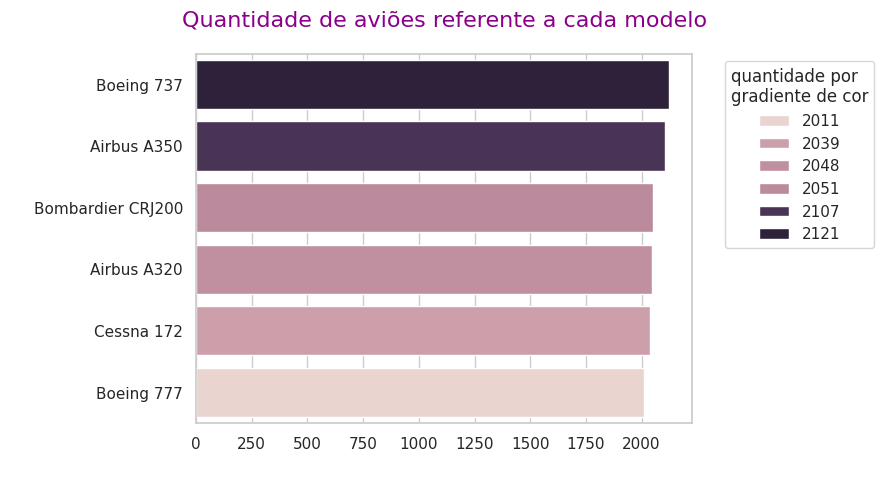

In [728]:
gp=df["modelo"].value_counts()
gp=gp.reset_index()
gp.columns = ["modelo", "quantidade"]
sns.set_theme(style="whitegrid")
plt.title("Quantidade de aviões referente a cada modelo", fontsize=16, color='#8B008B', pad=20)
sns.barplot(data=gp,x="quantidade",y="modelo", hue="quantidade", orient="y")
plt.legend(title="quantidade por \ngradiente de cor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks()
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

Na representação a seguir é possível notar a quantidade de cada tipo de motor, mostrando que há mais de 10 mil tipos de motores Turbofan 🧑🏼‍🔧

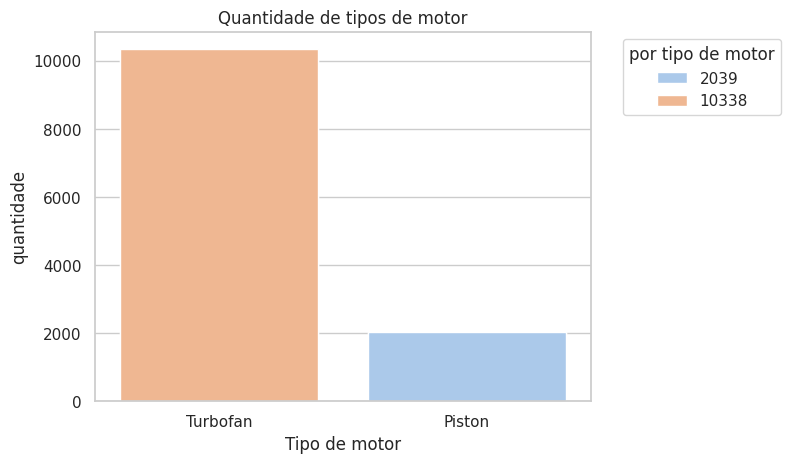

In [729]:
gp = df["tipo_motor"].value_counts()
gp = gp.reset_index()
gp.columns = ["tipo_motor", "quantidade"]

plt.title("Quantidade de tipos de motor")
sns.barplot(data=gp, x="tipo_motor", y="quantidade")
sns.barplot(data=gp,x="tipo_motor",y="quantidade", hue="quantidade", orient="x", palette="pastel")
plt.legend(title="por tipo de motor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Tipo de motor")
plt.show()

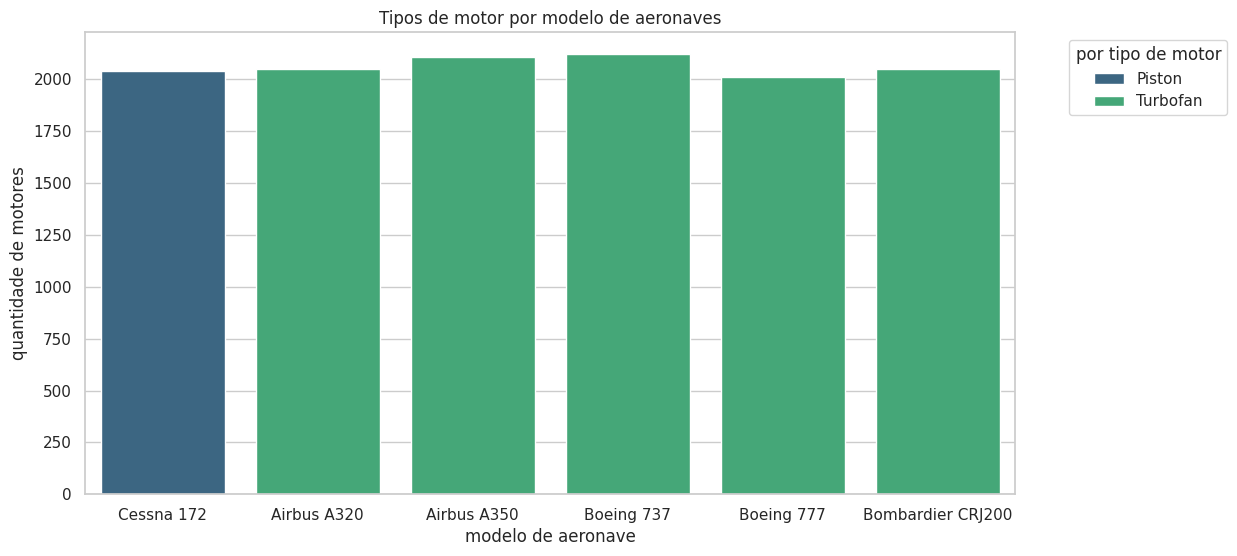

In [730]:
gp_modelo_motor = df.groupby(["tipo_motor", "modelo"]).size().reset_index(name="quantidade")
plt.figure(figsize=(12, 6))
sns.barplot(data=gp_modelo_motor, x="modelo", y="quantidade", hue="tipo_motor", palette="viridis")

plt.xlabel("modelo de aeronave")
plt.ylabel("quantidade de motores")
plt.title("Tipos de motor por modelo de aeronaves")
plt.legend(title="por tipo de motor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Os outliers indicam que há valores bem acima do normal, mas a empresa é ciente de que aeronaves tem categorias e capacidade diferentes, além de outros aspectos, por isso é importante conhecer cada um dos dados, mas pelo que pode ser percebido é fundamental tentar agrupr os modelos e comparar por categoria, para analisar melhor se os dados estão coerentes.

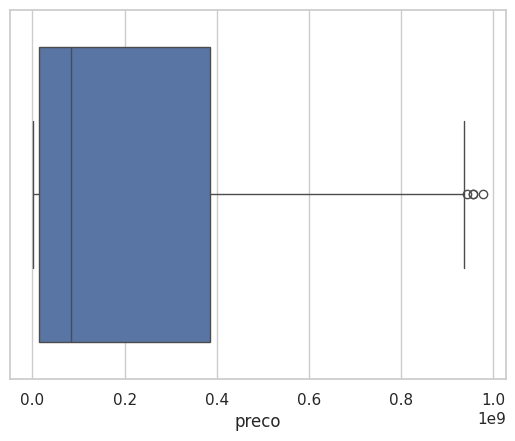

In [731]:
sns.boxplot(x=df['preco'])
plt.show()


🔹🔹<font color="#4682B4" size="3">**ANÁLISE BIVARIADA**</font> 📊

Definir a faixa de preços de acordo com modelo pode garantir melhor entendimento entre os valores das aeronaves e assim é mais fácil identificar os preços, se são justos entre aeronaves do mesmo modelo e assim poder indicar um preço justo para cada modelo de acordo com a média, por exemplo. Além disso, alertar clientes se o preço está muito elevado, de acordo com o modelo fazendo com que o comprador evite uma compra ruim sem referências, entre outros fatores.

In [732]:
df.groupby("modelo").agg({"preco": ["min", "mean", "median", "max"]})

preco                                          
                            min          mean        median           max
modelo                                                                   
Airbus A320        5.253655e+07  1.015897e+08  9.098483e+07  1.910509e+08
Airbus A350        2.519628e+08  4.815106e+08  4.306827e+08  9.048767e+08
Boeing 737         4.447806e+07  8.154770e+07  7.296603e+07  1.509432e+08
Boeing 777         2.702219e+08  5.134486e+08  4.627188e+08  9.782132e+08
Bombardier CRJ200  8.150222e+06  1.574260e+07  1.398250e+07  3.230731e+07
Cessna 172         1.458148e+05  2.794055e+05  2.514744e+05  5.612793e+05

In [733]:
gp_price = df.groupby("modelo").agg(min_price=("preco", "min"),
                              mean_price=("preco","mean"),
                              median_price=("preco","median"),
                              max_price=("preco", "max"))
gp_price.reset_index(inplace=True)
gp_price["min_price"] = gp_price["min_price"].apply(lambda x:f"${x:,.2f}") 
gp_price["mean_price"] = gp_price["mean_price"].apply(lambda x:f"${x:,.2f}") 
gp_price["median_price"] = gp_price["median_price"].apply(lambda x:f"${x:,.2f}") 
gp_price["max_price"] = gp_price["max_price"].apply(lambda x:f"${x:,.2f}") 
print(gp_price)

              modelo        min_price       mean_price     median_price  \
0        Airbus A320   $52,536,552.47  $101,589,716.29   $90,984,828.42   
1        Airbus A350  $251,962,755.21  $481,510,612.46  $430,682,709.52   
2         Boeing 737   $44,478,058.38   $81,547,697.76   $72,966,029.74   
3         Boeing 777  $270,221,929.00  $513,448,553.63  $462,718,837.30   
4  Bombardier CRJ200    $8,150,222.33   $15,742,596.43   $13,982,497.41   
5         Cessna 172      $145,814.79      $279,405.47      $251,474.43   

         max_price  
0  $191,050,892.95  
1  $904,876,723.48  
2  $150,943,234.53  
3  $978,213,228.63  
4   $32,307,310.30  
5      $561,279.30  


Com a anaise estaística dos preços, podemos analisar em forma visual evitando valores extremos, que a empresa pode obter a mediana dos preços de cada modelo de avião, já que se um cliente quer comprar uma aeronave com um preço equilibrado de acordo com o modelo e seus recursos ele terá um bom ponto de referência.

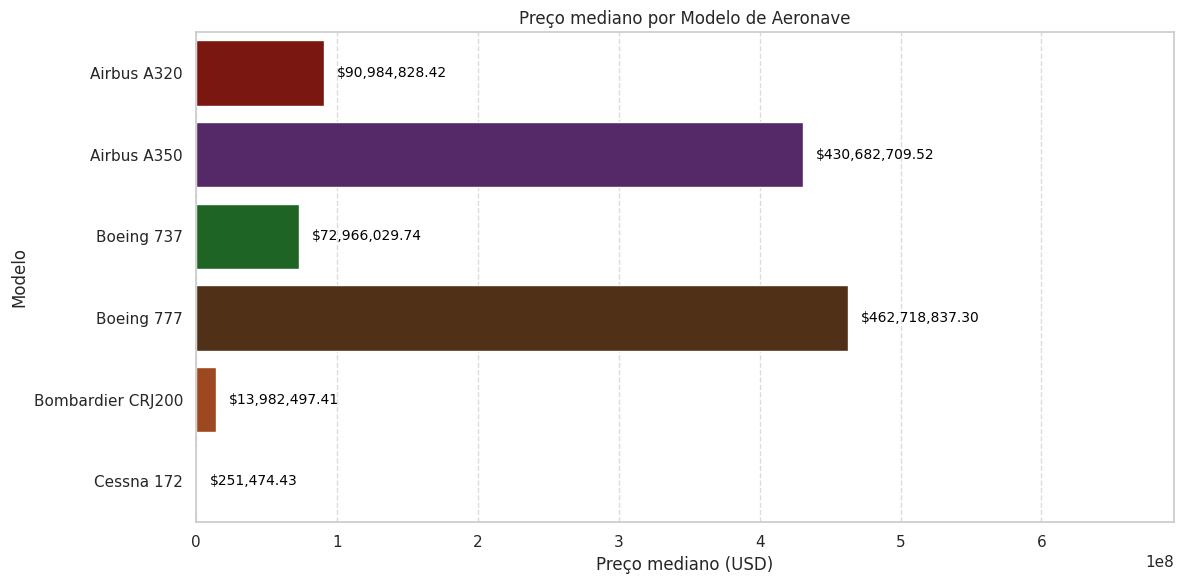

In [734]:
gp_price["median_price"] = gp_price["median_price"].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(12, 6))
sns.barplot(data=gp_price, x="median_price", y="modelo", hue="median_price", palette="dark", legend=False)

for index, value in enumerate(gp_price["median_price"]):
    plt.text(value + 0.02 * max(gp_price["median_price"]), index, f"${value:,.2f}", va="center", fontsize=10, color="black")

plt.xlabel("Preço mediano (USD)")
plt.ylabel("Modelo")
plt.title("Preço mediano por Modelo de Aeronave")
plt.xlim(0, max(gp_price["median_price"]) * 1.5)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Apesar de ser feita a análise bivariada com preço e modelo, é importante salientar que pode haver variação de preços do mesmo modelo de acordo com os anos de fabriaçao das aeronaves, por isso a análise é importante, assim pode ser avaliado se o preço da aeronave em questão, dependendo do ano, foi caindo com o tempo ou não.

In [735]:
df.groupby(['modelo', 'ano_fabricacao']).agg({"preco": ["min", "mean", "median", "max"]})

preco                              \
                                    min          mean        median   
modelo      ano_fabricacao                                            
Airbus A320 1980            59832306.58  7.878640e+07  7.935187e+07   
            1981            59047451.24  7.865017e+07  7.898016e+07   
            1982            59961186.45  7.728584e+07  7.713900e+07   
            1983            63442829.48  7.757039e+07  7.774046e+07   
            1984            54221016.52  7.538875e+07  7.537720e+07   
...                                 ...           ...           ...   
Cessna 172  2019              277063.11  3.874909e+05  3.952753e+05   
            2020              332849.80  4.053802e+05  4.074546e+05   
            2021              329040.06  4.015374e+05  4.027003e+05   
            2022              328506.24  4.085617e+05  4.121698e+05   
            2023              358284.42  4.248015e+05  4.136969e+05   

                                         
                                    max  
modelo      ano_fabricacao               
Airbus A320 1980            91647792.99  
            1981            95677466.83  
            1982            92887652.03  
            1983            89665631.07  
            1984            94594364.65  
...                                 ...  
Cessna 172  2019              480455.36  
            2020              470552.07  
            2021              483728.56  
            2022              485073.44  
            2023              561279.30  

[264 rows x 4 columns]

Dependendo do perfil do comprador, sendo ele uma empresa de viagens aéreas, ou outras finalidades, é importante saber o preço também por capacidade, não apenas modelo, além do limite de quilometragem, já que algumas empresas oferecem voôs internacionais ou trabalham com voôs de carga.

In [736]:
gp = df.groupby("modelo").agg(max=("capacidade", "max"))
gp.reset_index(inplace=True)
gp

,modelo,max
0,Airbus A320,180
1,Airbus A350,350
2,Boeing 737,162
3,Boeing 777,396
4,Bombardier CRJ200,50
5,Cessna 172,4


In [737]:
gp = df.groupby("modelo").agg(max=("alcance_km", "max"))
gp.reset_index(inplace=True)
gp

,modelo,max
0,Airbus A320,6300
1,Airbus A350,14800
2,Boeing 737,5700
3,Boeing 777,15600
4,Bombardier CRJ200,3000
5,Cessna 172,1285


Os compradores também podem se interessar em aeronaves que tem economia de combustível e evitar modelos de aeronaves que tem maior consumo, ainda mais se as aeronaves forem de carga, além disso, ajudaria ainda mais o cliente um gráfico onde pode ser mostrado o custo de manutenção por hora e consumo de combustível


In [738]:
gp = df.groupby("modelo").agg({"consumo_combustivel_por_hora": "mean", "custo_manutencao_por_hora": "mean", "alcance_km":"mean"})
gp.reset_index()
gp


,consumo_combustivel_por_hora,custo_manutencao_por_hora,alcance_km
modelo,,,
Airbus A320,8.594028,2798.925820,6300.0
Airbus A350,8.499117,2714.306830,14800.0
Boeing 737,8.510207,2744.832909,5700.0
Boeing 777,8.538996,2707.629766,15600.0
Bombardier CRJ200,8.439805,2779.267767,3000.0
Cessna 172,30.122398,2719.588107,1285.0


In [739]:
print(gp.columns)

Index(['consumo_combustivel_por_hora', 'custo_manutencao_por_hora',
       'alcance_km'],
      dtype='object')


/tmp/ipykernel_10719/3522904404.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gp, x="alcance_km", y="modelo", palette='viridis')


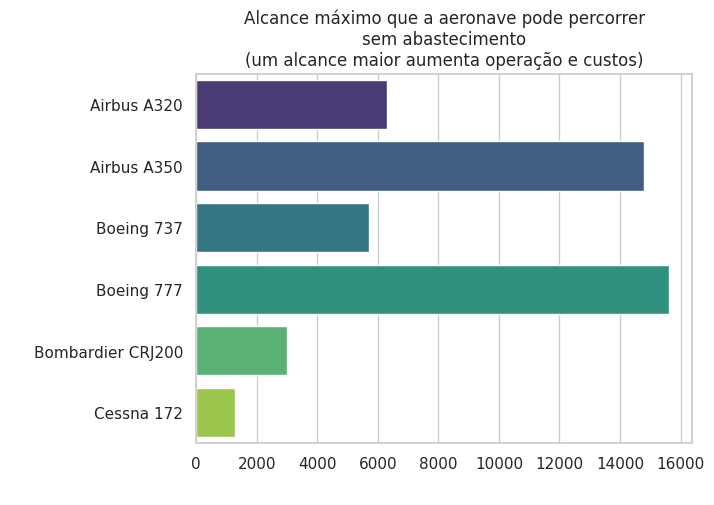

In [740]:
sns.barplot(data=gp, x="alcance_km", y="modelo", palette='viridis')
plt.title("Alcance máximo que a aeronave pode percorrer\nsem abastecimento\n(um alcance maior aumenta operação e custos)")

plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

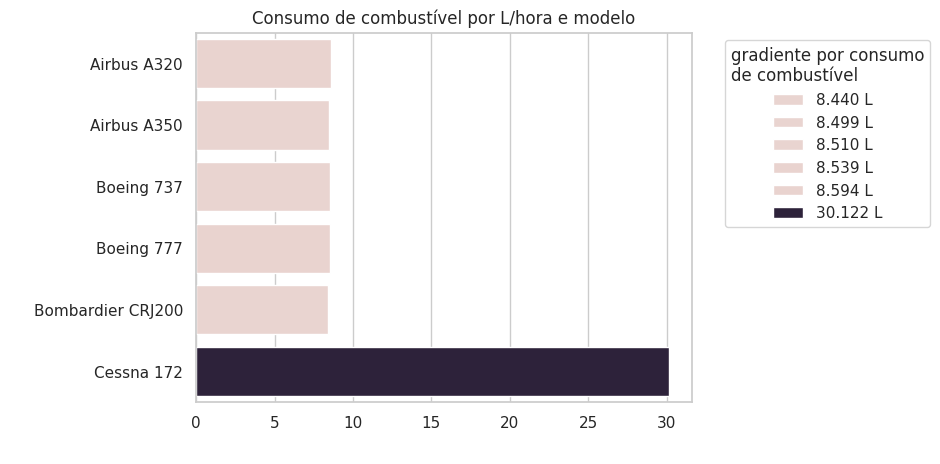

In [741]:
sns.barplot(data=gp, x="consumo_combustivel_por_hora", y="modelo", hue="consumo_combustivel_por_hora")
plt.title("Consumo de combustível por L/hora e modelo")

handles,labels = plt.gca().get_legend_handles_labels()
labels=[f"{float(l):.3f} L" for l in labels]
plt.legend(handles, labels,title="gradiente por consumo\nde combustível", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()


Com a análise de custo de manutenção por hora de acordo com o modelo, a empresa pode perceber qual modelo pode ser indicado para compradores que buscam o custo menor de manutenção.

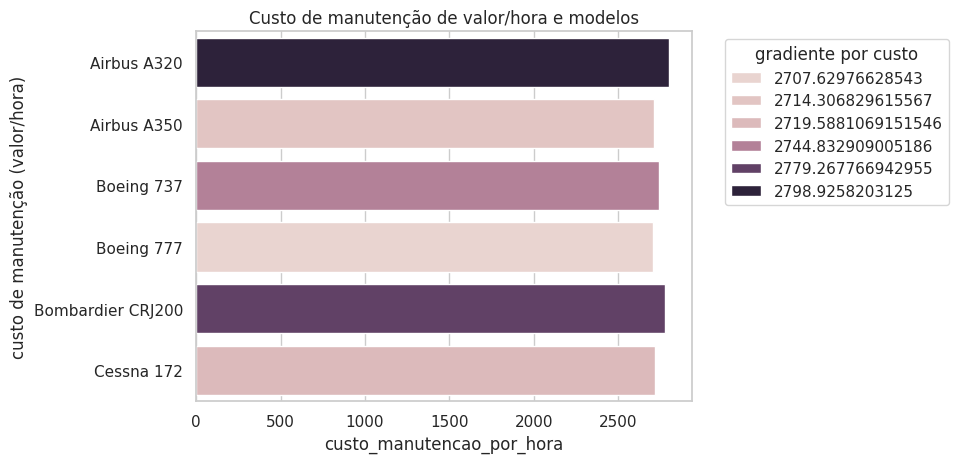

In [742]:
sns.barplot(data=gp, x="custo_manutencao_por_hora", y="modelo", hue="custo_manutencao_por_hora")
plt.title("Custo de manutenção de valor/hora e modelos")
plt.legend(title="gradiente por custo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("custo de manutenção (valor/hora)")
plt.show()

Os boxplots mostram a distribuição dos preços de acordo com cada modelo, por exemplo, compradores que quiserem aeronaves que tem um equlíbrio entre estes dois atributos, sendo eles custo e desempenho, podem optar mais pelos modelos Airbus A320 e Boeing 737. Contudo o Airbus 320 além de ser estável entre o consumo e capacidade não demonstrou outliers visíveis, chegando a conclusão que que também tem preços mais previsíveis, então isso pode ser uma opção mais segura para stakeholders que buscam mais equilíbrio e previsão segura de preços

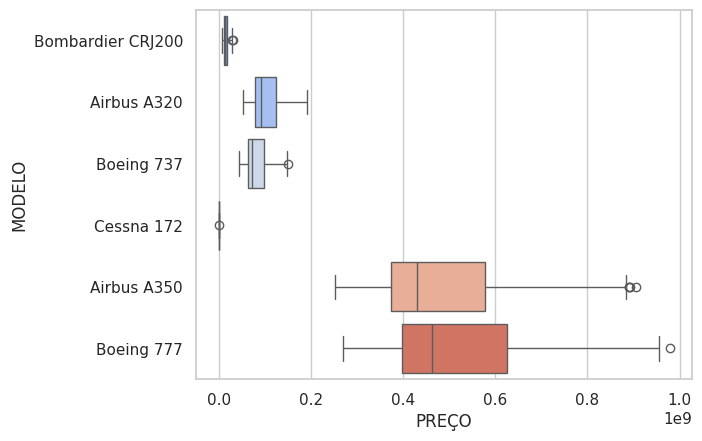

In [743]:
sns.boxplot(df, x='preco', y='modelo', hue="modelo", palette="coolwarm")
plt.xlabel("PREÇO")
plt.ylabel("MODELO")
plt.show()

In [744]:
# calculo do preço médio absoluto para cada modelo a cada ano
gp = df.groupby(["ano_fabricacao", "modelo"]).agg({"preco": "mean"})
gp.reset_index()


,ano_fabricacao,modelo,preco
0,1980,Airbus A320,7.878640e+07
1,1980,Airbus A350,3.700725e+08
2,1980,Boeing 737,6.272068e+07
3,1980,Boeing 777,3.975311e+08
4,1980,Bombardier CRJ200,1.187683e+07
...,...,...,...
259,2023,Airbus A350,7.391922e+08
260,2023,Boeing 737,1.253520e+08
261,2023,Boeing 777,7.931795e+08
262,2023,Bombardier CRJ200,2.454664e+07


Plotando um gráfico de linha, é possivel mostrar a evolução do preço dos aviões ao longo dos anos, sendo comparado o ano de fabricação das aeronaves pelo preço médio absoluto de cada modelo/ano

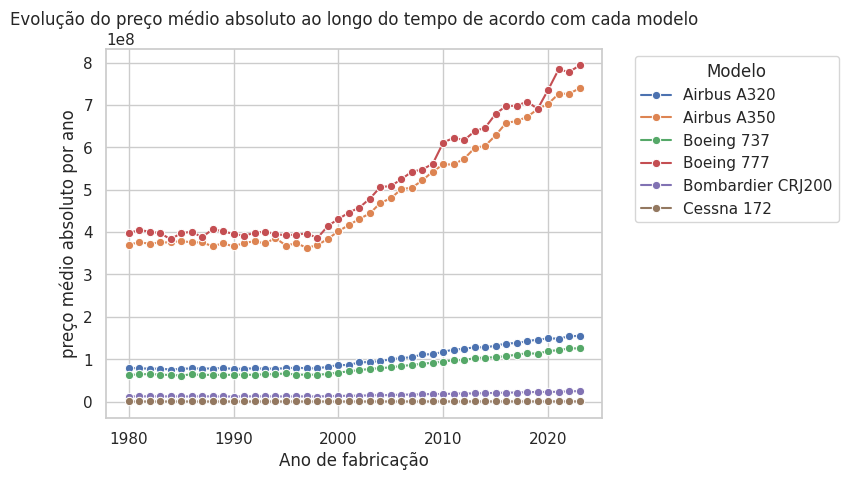

In [745]:

sns.lineplot(data=gp, x="ano_fabricacao", y="preco", hue="modelo", marker="o")
plt.title("Evolução do preço médio absoluto ao longo do tempo de acordo com cada modelo")
plt.xlabel("Ano de fabricação")
plt.ylabel("preço médio absoluto por ano")
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc='upper left')

Já que a demanda regional e as variações de cambio podem alterar os preços, pode se tornar interessante a análise da coluna de vendas por região `regiao_venda`, por exemplo, podemos filtrar em `gp_asia = gp[gp["regiao_venda"] == "Güney Amerika"]` por cada região, analisando a média por preço e modelo das vendas em cada região.

In [746]:
# listar quais são as regiões
df.columns

Index(['modelo', 'ano_fabricacao', 'qtde_motores', 'tipo_motor', 'capacidade',
       'alcance_km', 'consumo_combustivel_por_hora',
       'custo_manutencao_por_hora', 'regiao_venda', 'preco'],
      dtype='object')

In [747]:
print(df["regiao_venda"].unique())

['Asya' 'Avrupa' 'Avustralya' 'Güney Amerika' 'Afrika' 'Kuzey Amerika']


In [748]:
gp = df.groupby(["ano_fabricacao", "modelo", "regiao_venda"]).agg({"preco":"mean"}).reset_index()


In [749]:
print(gp.columns)


Index(['ano_fabricacao', 'modelo', 'regiao_venda', 'preco'], dtype='object')


evolução do preço dos aviões ao longo dos anos, sendo comparado o ano de fabricação das aeronaves pelo preço médio absoluto de acordo com a região filtrada, neste caso: `Güney Amerika` (América do Sul)

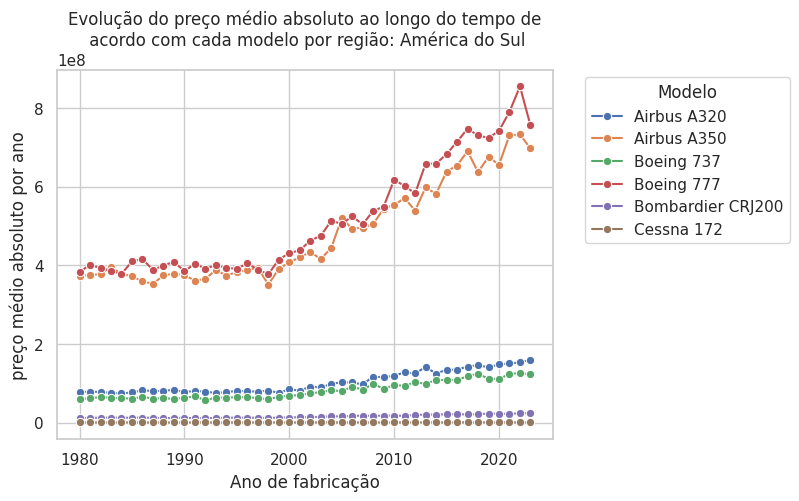

In [750]:
gp_regiao = gp[gp["regiao_venda"] == "Güney Amerika"]
sns.lineplot(data=gp_regiao, x="ano_fabricacao", y="preco",hue="modelo", marker="o")
plt.title("Evolução do preço médio absoluto ao longo do tempo de\n acordo com cada modelo por região: América do Sul")
plt.xlabel("Ano de fabricação")
plt.ylabel("preço médio absoluto por ano")
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc='upper left')

In [751]:
# calculando preço relativo de cada modelo em relação à media de preço de todos as aeronaves por ano
gp = df.groupby(["ano_fabricacao", "modelo"]).agg(mean=("preco", "mean")) / df.groupby(["ano_fabricacao"]).agg(mean=("preco", "mean"))
gp["mean"] = gp["mean"].round(3)
gp.reset_index(inplace=True)
gp

,ano_fabricacao,modelo,mean
0,1980,Airbus A320,0.480
1,1980,Airbus A350,2.253
2,1980,Boeing 737,0.382
3,1980,Boeing 777,2.421
4,1980,Bombardier CRJ200,0.072
...,...,...,...
259,2023,Airbus A350,2.359
260,2023,Boeing 737,0.400
261,2023,Boeing 777,2.531
262,2023,Bombardier CRJ200,0.078


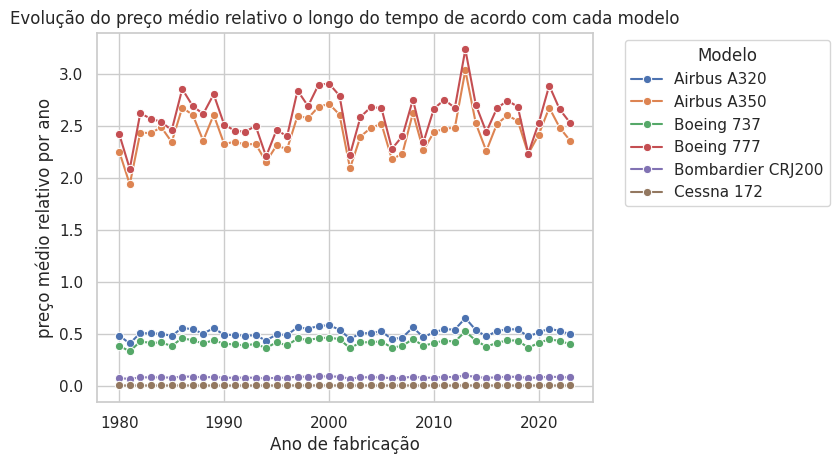

In [752]:
sns.lineplot(data=gp, x="ano_fabricacao", y="mean",hue="modelo", marker="o")
plt.title("Evolução do preço médio relativo o longo do tempo de acordo com cada modelo")
plt.xlabel("Ano de fabricação")
plt.ylabel("preço médio relativo por ano")
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc='upper left')

In [753]:
gp = df.groupby(["ano_fabricacao", "modelo"]).agg(mean=("preco", "mean")) / df.groupby(["ano_fabricacao", "regiao_venda"]).agg(mean=("preco", "mean"))
gp["mean"] = gp["mean"].round(3)
gp.reset_index(inplace=True)
gp

,ano_fabricacao,modelo,regiao_venda,mean
0,1980,Airbus A320,Afrika,0.442
1,1980,Airbus A320,Asya,0.482
2,1980,Airbus A320,Avrupa,0.495
3,1980,Airbus A320,Avustralya,0.590
4,1980,Airbus A320,Güney Amerika,0.441
...,...,...,...,...
1579,2023,Cessna 172,Asya,0.001
1580,2023,Cessna 172,Avrupa,0.001
1581,2023,Cessna 172,Avustralya,0.001
1582,2023,Cessna 172,Güney Amerika,0.001


evolução do preço das aeronaves longo dos anos, sendo comparado o ano de fabricação das aeronaves pelo preço relativo de acordo com a região filtrada, no caso: `Asya` (Ásia)

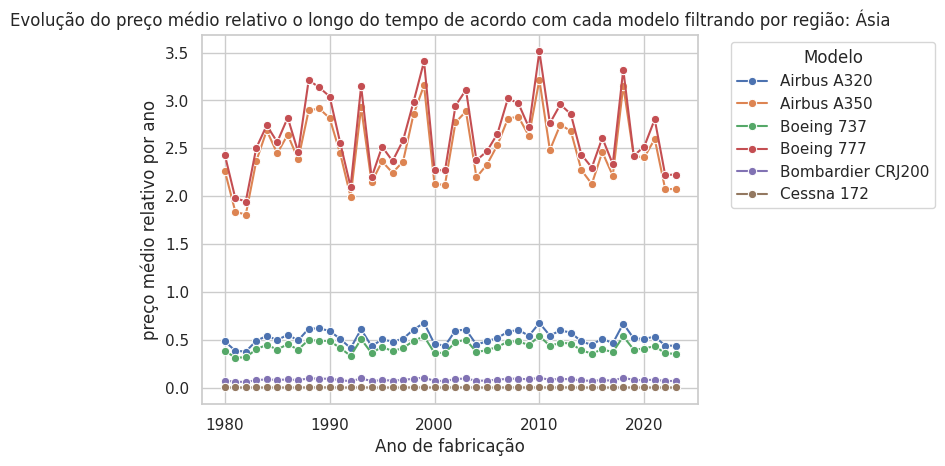

In [754]:
gp_regiao = gp[gp["regiao_venda"]=="Asya"]
sns.lineplot(data=gp_regiao, x="ano_fabricacao",y="mean",hue="modelo", marker="o")
plt.title("Evolução do preço médio relativo o longo do tempo de acordo com cada modelo filtrando por região: Ásia")
plt.xlabel("Ano de fabricação")
plt.ylabel("preço médio relativo por ano")
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc='upper left')


A empresa pode considerar visualizar os tipos de motores também o ano em que foram fabricados e a tendência deles no mercado, podendo assim entender a preferência não só por aeronaves, mas por tipo de motor

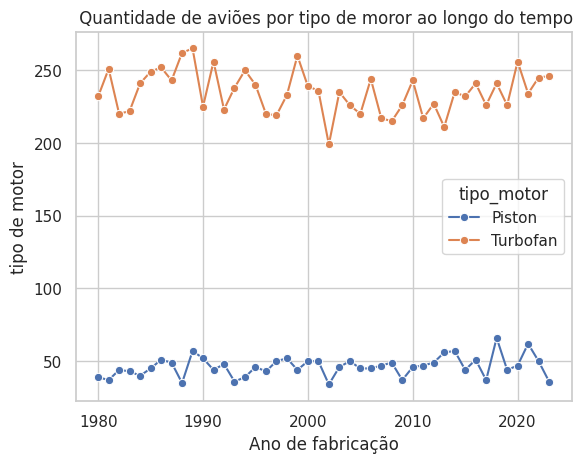

In [755]:
# contagem do numero de avioes por motor em cada ano
gp_motor = df.groupby(["ano_fabricacao","tipo_motor"]).agg(count=("tipo_motor","count"))
gp_motor.reset_index(inplace=True)
sns.lineplot(data=gp_motor,x="ano_fabricacao", y="count", hue="tipo_motor", marker="o")
plt.title(" Quantidade de aviões por tipo de moror ao longo do tempo")
plt.xlabel("Ano de fabricação")
plt.ylabel("tipo de motor")
plt.show()

A empresa pode gerar também os lineplots para os dados categóricos e ver como o preço médio evoluiu ao longo do tempo para cada modelo

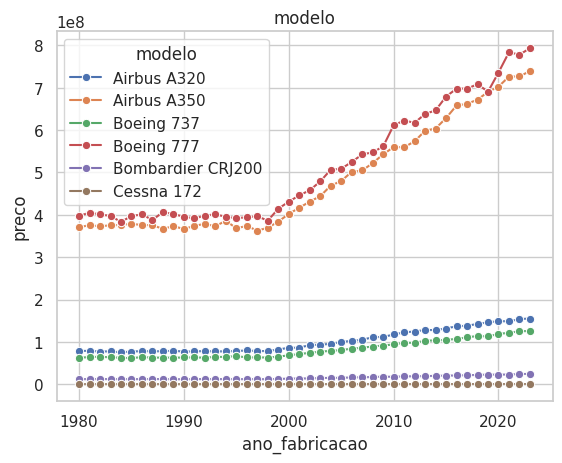

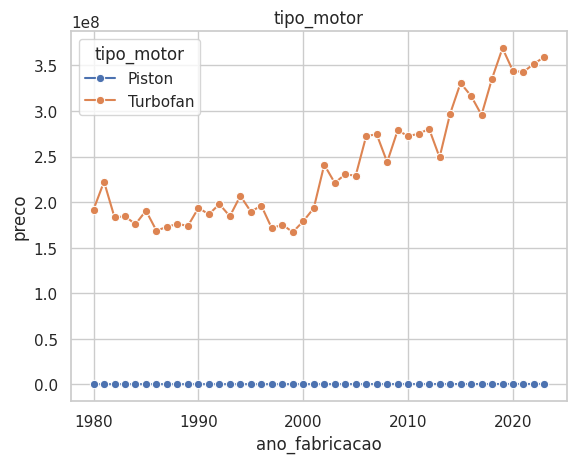

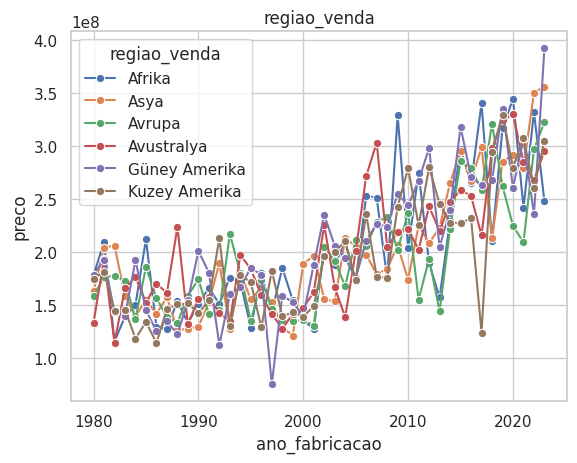

In [756]:
cat_cols = df.select_dtypes(exclude="number").columns
for col in cat_cols:
    gp = df.groupby(["ano_fabricacao", col])["preco"].mean()
    gp=gp.reset_index()

    plt.clf()
    sns.lineplot(gp,x="ano_fabricacao",y="preco",hue=col, marker="o")
    plt.title(col)
    plt.show()

In [757]:
num_cols = df.select_dtypes(include="number").columns

A matriz a seguir por mapa de calor mostra também que a capacidade e alcance em km é alta, levando a empresa à lógica que se a capacidade do avião é alta, faz sentido ele ter maior alcance por km. O preço também mostra bastante correlação com capacidade e alcance, o que nos mostra que possam ser atributos que façam com que os preços aumentem por ter mais destes aspectos

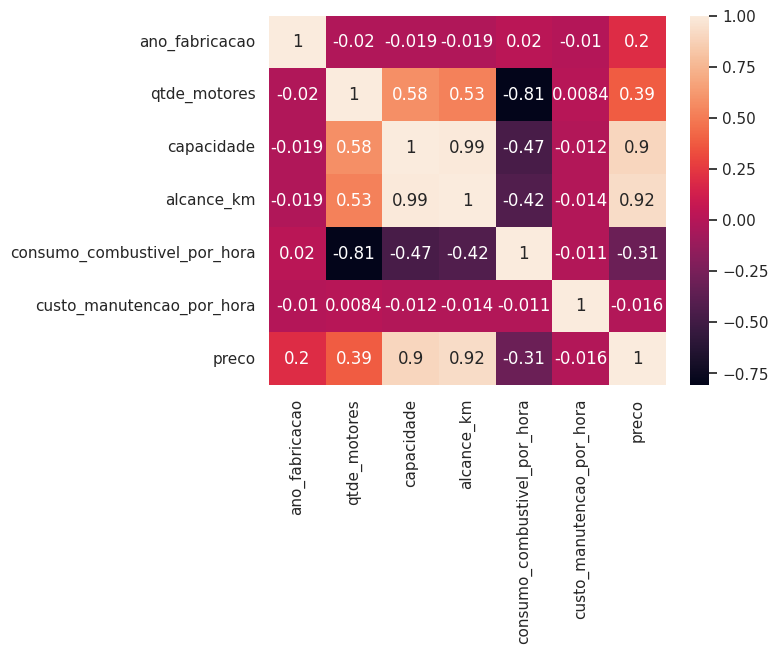

In [758]:
corr = df[num_cols].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
plt.show()

🧩 ENGENHARIA E SELEÇÃO DAS FEATURES

In [759]:
gp.columns

Index(['ano_fabricacao', 'regiao_venda', 'preco'], dtype='object')

In [760]:
df.columns

Index(['modelo', 'ano_fabricacao', 'qtde_motores', 'tipo_motor', 'capacidade',
       'alcance_km', 'consumo_combustivel_por_hora',
       'custo_manutencao_por_hora', 'regiao_venda', 'preco'],
      dtype='object')

In [761]:
df.head()

,modelo,ano_fabricacao,qtde_motores,tipo_motor,capacidade,alcance_km,consumo_combustivel_por_hora,custo_manutencao_por_hora,regiao_venda,preco
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,Güney Amerika,2.037981e+05


In [762]:
gp.head()

,ano_fabricacao,regiao_venda,preco
0,1980,Afrika,1.783041e+08
1,1980,Asya,1.633727e+08
2,1980,Avrupa,1.592935e+08
3,1980,Avustralya,1.334858e+08
4,1980,Güney Amerika,1.787782e+08


In [763]:
gp_features = df.groupby(["ano_fabricacao", "modelo", "tipo_motor"]).agg(mean_preco=("preco", "mean"))
gp_features.reset_index()

,ano_fabricacao,modelo,tipo_motor,mean_preco
0,1980,Airbus A320,Turbofan,7.878640e+07
1,1980,Airbus A350,Turbofan,3.700725e+08
2,1980,Boeing 737,Turbofan,6.272068e+07
3,1980,Boeing 777,Turbofan,3.975311e+08
4,1980,Bombardier CRJ200,Turbofan,1.187683e+07
...,...,...,...,...
259,2023,Airbus A350,Turbofan,7.391922e+08
260,2023,Boeing 737,Turbofan,1.253520e+08
261,2023,Boeing 777,Turbofan,7.931795e+08
262,2023,Bombardier CRJ200,Turbofan,2.454664e+07


Mix: Para criar combinação de colunas

Binning: Para agrupar as features continuas em categoricas e facilitar a análise


In [764]:
# mix
df["modelo_categoria"] = df["modelo"] + "_" + df["tipo_motor"]
df["modelo_categoria"].head()

0    Bombardier CRJ200_Turbofan
1    Bombardier CRJ200_Turbofan
2          Airbus A320_Turbofan
3           Boeing 737_Turbofan
4             Cessna 172_Piston
Name: modelo_categoria, dtype: object

In [765]:
# Binning
df["ano_fabricacao_categorias"],bins=pd.qcut(df["ano_fabricacao"],4,labels=False,retbins=True)
bins

array([1980., 1990., 2001., 2013., 2023.])

In [766]:
df["alcance_km_cat"], bins=pd.qcut(df["alcance_km"], 5, labels=False, retbins=True)
bins

array([ 1285.,  3000.,  5700.,  6300., 14800., 15600.])

A empresa deve considerar a "filtragem" de quais são as variáveis importantes para análise que vão possibilitar a indicação das melhores possibilidades de compras e assim garantir apenas o essencial

In [767]:
sel_cols = ["ano_fabricacao",
            "qtde_motores",
            "tipo_motor",
            "capacidade",
            "alcance_km",
            "consumo_combustivel_por_hora",
            "custo_manutencao_por_hora",
            "regiao_venda",
            "preco"]
df = df[sel_cols]

Até agora pela análise exploratória de dados a empresa conseguiu identificar que `["preco","alcance_km","consumo_de_combustivel_por_hora"]` podem ser variáveis numerica contínuas, enquanto `["ano_fabricacao"]` pode ser além de numérica, stanto contínua quanto discreta, até mesmo se agrupada como em `qcut`, pode ser usada como categórica, `["qtde_motores"]` também pode ser discreto, mas dependendo da análise pode ser usado como categórico. Enquanto que variáveis como `["modelo","tipo_motor","regiao_venda"]` podem ser categóricas

Para a previsão de preço, a empresa pode usar modelos como Regressão Linear ou Random Forest, enquanto que para classificação usaria algo comoÁrvoresde decisão, assim poderia fazer previsão de por exemplo tipo da aeronave, mas testar modelos é o que ajudara com exito a executar uma boa consultoria.

In [768]:
x = df[["ano_fabricacao", "alcance_km", "consumo_combustivel_por_hora"]]
y = df["preco"]

✂️ Split: Estratificação dos dados para treino e teste

In [769]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

🏋️‍♂️ TREINAMENTO E PREVISÃO 💪

📈 Com Linear Regression

In [770]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(x, y)

print("score:", model_linear_regression.score(x, y))

score: 0.9050500805510971


In [771]:
model_linear_regression.fit(x_train, y_train)

LinearRegression()

In [772]:
imp = model_linear_regression.coef_
cols = x_train.columns

importance = pd.DataFrame({"column": cols, "importance":imp}).sort_values(by="importance",ascending=False)
importance.style.background_gradient()

,column,importance
0,ano_fabricacao,3791696.442697
2,consumo_combustivel_por_hora,2216177.661572
1,alcance_km,40271.171390


Agora da para visualizar quais variáveis tem mais correlação com o preço, no caso, foi relevante no resultado acima que `ano_fabricacao` tem maior valor do coeficiente, então dá para levar em consideração que a idade do avião tem bastante influência sobre o preço.

🌲 Com Random Forest Regressor

In [773]:
def train_RandomForestRegressor(x_train, y_train, x_test, y_test):
    modelo_rf = RandomForestRegressor()
    modelo_rf.fit(x_train, y_train)
    print("score - Random Forest:", modelo_rf.score(x_test, y_test))

    imp = modelo_rf.feature_importances_
    cols = x_train.columns

    return modelo_rf

In [774]:
importance = pd.DataFrame({"column": cols, "importance":imp}).sort_values(by="importance",ascending=False)
importance.style.background_gradient()

,column,importance
0,ano_fabricacao,3791696.442697
2,consumo_combustivel_por_hora,2216177.661572
1,alcance_km,40271.171390


Com DecisionTreeRegressor 🌳🌳🌳

In [777]:
modelo_dt = DecisionTreeRegressor(random_state=42)
modelo_dt.fit(x_train, y_train)
print("score (accuracy) - DecisionTreeRegressor:", modelo_dt.score(x, y))


score (accuracy) - DecisionTreeRegressor: 0.9926707225944135


In [778]:
modelo_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [779]:
imp = modelo_dt.feature_importances_
cols = x_train.columns

pd.DataFrame({"column": cols, "importance": imp}).style.background_gradient()

,column,importance
0,ano_fabricacao,0.113184
1,alcance_km,0.872258
2,consumo_combustivel_por_hora,0.014558


Agora da para visualizar também que para a tomada de decisão é melhor levar em consideração `alcance_km` que é o alcance máximo em que o avião pode viajar sem reabastecimento, e já que nos dados apresentados o alcance em km significaria que o maior alcance aumenta a flexibilidade operacional e o custo, entende-se o porquê  de ter a maior importância nas previsões

🔎 PREVISÕES entre os modelos com LinearRegression e RandomForestRegressor

In [780]:
modelo_rf = train_RandomForestRegressor(x_train, y_train, x_test, y_test)

score - Random Forest: 0.9765747167917402


In [781]:
# previsoes e calculo de metricas com modelo de Linear Regression
def predLinearRegression(x_test, y_test):
    yPred_linear_regressison = model_linear_regression.predict(x_test)

    mae_linear = mean_absolute_error(y_test,yPred_linear_regressison)
    mse_linear = mean_squared_error(y_test,yPred_linear_regressison)
    r2_linear_regression = r2_score(y_test,yPred_linear_regressison)
    rmse_linear = np.sqrt(mse_linear)
    return [yPred_linear_regressison, mae_linear,mse_linear,r2_linear_regression,rmse_linear]


In [782]:
# previsoes e calculo de metricas para RandomForest
def predRandomForestRegressor(x_test, y_test):
    yPred_rf = modelo_rf.predict(x_test)

    mae_rf = mean_absolute_error(y_test,yPred_rf)
    mse_rf = mean_squared_error(y_test,yPred_rf)
    r2_rf = r2_score(y_test,yPred_rf)
    rmse_rf = np.sqrt(mse_rf)
    return [yPred_rf, mae_rf,mse_rf, r2_rf, rmse_rf]

In [783]:
# previsões e calculo de metricas pra DecisionTreeRegressor
def predDecisionTreeRegressor(x_test, y_test):
    y_Pred_dt = modelo_dt.predict(x_test)

    mae_dt = mean_absolute_error(y_test, y_Pred_dt)
    mse_dt = mean_squared_error(y_test, y_Pred_dt)
    r2_dt = r2_score(y_test, y_Pred_dt)
    rmse_dt = np.sqrt(mse_dt)
    return [y_Pred_dt, mae_dt,mse_dt,r2_dt,rmse_dt]

⚔️ COMPARAÇÃO ENTRE OS MODELOS

In [784]:
print("Regressão Linear -> MAE", predLinearRegression(x_test,y_test)[1], " MSE ", predLinearRegression(x_test,y_test)[2], " R² ", predLinearRegression(x_test,y_test)[3], " RMSE ", predLinearRegression(x_test,y_test)[4])
print("----")
print("Random Forest    -> MAE", predRandomForestRegressor(x_test,y_test)[1], " MSE ", predRandomForestRegressor(x_test,y_test)[2],  " R²" , predRandomForestRegressor(x_test,y_test)[3], "   RMSE ", predRandomForestRegressor(x_test,y_test)[4])
print("-----")
print("Decision Tree    -> MAE:", predDecisionTreeRegressor(x_test,y_test)[1], " MSE ", predDecisionTreeRegressor(x_test,y_test)[2], " R² ", predDecisionTreeRegressor(x_test,y_test)[3], " RMSE ", predDecisionTreeRegressor(x_test,y_test)[4])


Regressão Linear -> MAE 54146162.19785749  MSE  5211601017802536.0  R²  0.9025020764084212  RMSE  72191419.28098197
----
Random Forest    -> MAE 18256552.551226955  MSE  1252162357035303.2  R² 0.9765747167917402    RMSE  35385906.19208872
-----
Decision Tree    -> MAE: 22406421.397854738  MSE  1867159739298715.5  R²  0.9650694293416618  RMSE  43210643.819534965


Para a empresa avaliar a precisão dos modelos de regressão foi utilizada a métrica MAE que é o erro medio entre os valores reais e os valores previstos pelo modelo e assim então escolher no momento qual MAE apresenta menos erros de previsão, em seguida deve-se analisar o MSE (Mean Squared Error, ou Erro Quadrático Médio) que parecido com o MAE deve-se considerar o menor, já que ele também indica os erros elevando ao quadrado. Em seguida considerar o coeficiente R² que com valores entre 0 e 1, que indica o melhor modelo, considerando que significaria mais precisão a variabilidade dos dados.

Sendo assim a diferença de 0.074 de precisão entre Regressão Linear e Random Forest, o Random Forest apresentou o melhor resultado com 0.976, enquanto Linear Regression apresentou um R² de 0.902 de precisão. a precisão do DecisionTreeRegressor ficou intermediário, apresentando um R² de 0.965, superando o de regressão linear, mas também foi inferior ao RandomForest de 0.976, tendo uma diferença de 0.011 de previsão.

Após a escolha do modelo para prever os preços de aeronaves é importante que a empresa possa ver quais variáveis impactam com o preço com a análise de `shap`, assim pode ser útil para que possa ser explicado ao cliente quais os fatores (como ano de fabricação por exemplo) são mais relevantes quando forem executar uma compra.

In [785]:
explainer = shap.TreeExplainer(modelo_rf, x_train)
shap_values = explainer.shap_values(x_test,check_additivity=False)

 99%|===================| 2454/2476 [00:45<00:00]        

No eixo x e nas cores do gráfico a empresa pode estar analisando o impacto das variáveis no preço, percebendo que `alcance_km` tem maior impacto sobre os preços e aviões mais novos tendem a ter o preço mais alto também, pode também ser percebido que o consumo de combustível, quanto maior o consumo de combustivel menor o preço da aeronave pode ser.

E assim a empresa pode analisar o SHAP para ajudar nas tomadas de decisões dos compradores com maior eficacia mostrando que os fatores em questão podem ser levados em consideração no momento de analisar qual a melhor possibilidade de compra dependendo de seu interesse, contrinuindo na consultoria dos compradores e ter explicações do porquê um avião tende a ser mais caro ou mais barato que outro

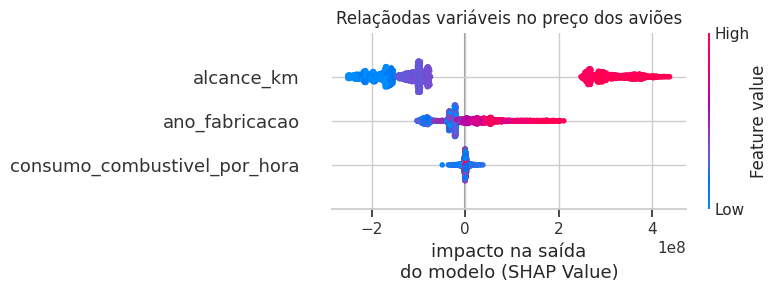

In [786]:
#grafico para analisar a importancia das variaveis
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns, show=False)
plt.title("Relaçãodas variáveis no preço dos aviões")
plt.xlabel("impacto na saída\ndo modelo (SHAP Value)")
plt.show()

👾 ADICIONANDO SIMULAÇÕES DE CASO DE USO

Com essa base de conjunto de dados, criação de modelo, compreensão do negócio, coleta e preparação dos dados, modelagem e evaliação, a empresa pode começar a consultoria com mais clareza de como executar melhor suas prestações de serviços com um caso de uso real, além de poder monitorar a performance e ir ajustando o modelo conforme necessário, sempre garantindo a otimização contínua do processo.

Exemplo1 : Então pra isso agora, podemos relacionar com um caso de uso real, que seria simulando por exemplo como seria o atendimento com o João da Silva, que quer comprar uma aeronave, com o ano entre 2020 a 20203, foi escolhido para simulação para previsão o ano de 2021 e que tenha uma boa capacidade, a seguir:

In [787]:
cliente_Joao_da_Silva = pd.DataFrame({"ano_fabricacao":[2021],"alcance_km":[max(df["alcance_km"])],
                                       "consumo_combustivel_por_hora":[min(df["consumo_combustivel_por_hora"])]})
previsao_preco = modelo_rf.predict(cliente_Joao_da_Silva)
print(f"Previsão de preço estimado de compra: {previsao_preco[0]:,.2f}")

Previsão de preço estimado de compra: 806,707,369.00


Exemplo 2: Paulo quer um avião acessível, onde pode ser uma aeronave mais barata, mesmo considerando menos capacidade e menor alcance, sendo inferior a 2020

In [788]:
cliente_Paulo = pd.DataFrame({"ano_fabricacao":[2015], "alcance_km":[min(df["alcance_km"])],
                              "consumo_combustivel_por_hora":[min(df["consumo_combustivel_por_hora"])]})
cliente_Paulo = modelo_rf.predict(cliente_Paulo)
print(f"Previsão de preço estimado de compra: {cliente_Paulo[0]:,.2f}")

Previsão de preço estimado de compra: 359,912.79


Exemplo 3: Paola quer uma aeronave que tenha alto desempenho, longo alcance e com ano de fabricação recente e o máximo de combustivel

In [789]:
Paola = pd.DataFrame({"ano_fabricacao":[2023], "alcance_km":[max(df["alcance_km"])],
                              "consumo_combustivel_por_hora":[max(df["consumo_combustivel_por_hora"])]})
Paola = modelo_rf.predict(Paola)
print(f"Previsão de preço estimado de compra: {Paola[0]:,.2f}")

Previsão de preço estimado de compra: 879,119,671.98


Uma análise ainda mais aprofundada seria analisar a qualidade das previsões do modelo usado RandomForest usando gŕafico de dispersão e de distribuição de resíduos


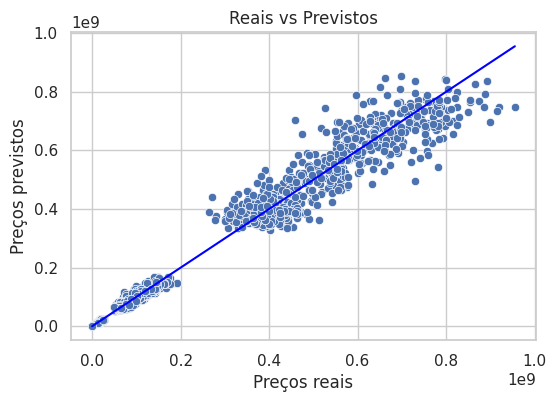

In [790]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=predRandomForestRegressor(x_test,y_test)[0])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.xlabel('Preços reais')
plt.ylabel('Preços previstos')
plt.title('Reais vs Previstos')
plt.show()

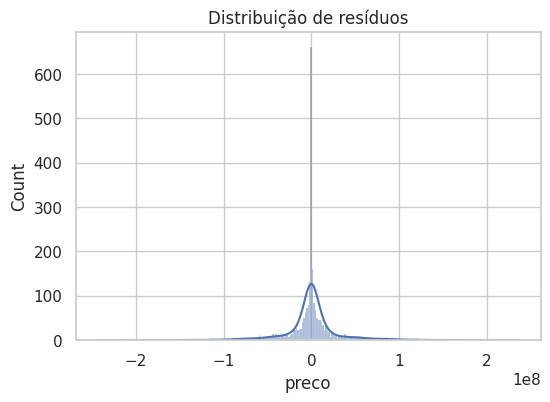

In [791]:
residuals = y_test - predRandomForestRegressor(x_test,y_test)[0]
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Distribuição de resíduos')
plt.show()

Demonstração de uso ciclico, remoção e adequação de dataframe para realizar brevemente nova forma de análise, teste e previsão, com a exclusão do modelo Cessna 172, considerado um avião de pequeno porte, de milhares de dolares, enquanto que os outros modelos são comerciais e de grande porte, mais potencia e uso de apenas motores Turbofan, para visualizar também se pode haver grande impacto, além de verificar o comportamento dos outliers após a retirada.
Considerando a retirada do unico modlelo que usa tipo de motor Piston é retirado o tipo de motor Piston e linhas do modelo Cessna 172 para analisar impacto nos modelos

In [792]:
df_v2 = read_and_rename(path,csv)
df_v2 = df_v2.reset_index()
df_v2.head()

,index,modelo,ano_fabricacao,qtde_motores,tipo_motor,capacidade,alcance_km,consumo_combustivel_por_hora,custo_manutencao_por_hora,idade,regiao_venda,preco
0,0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


In [793]:
df_v2 = df_v2[df_v2["modelo"] != "Cessna 172"]
df_v2.head()

,index,modelo,ano_fabricacao,qtde_motores,tipo_motor,capacidade,alcance_km,consumo_combustivel_por_hora,custo_manutencao_por_hora,idade,regiao_venda,preco
0,0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
5,5,Airbus A350,1982,2,Turbofan,350,14800,8.82,1869.09,41,Asya,3.549766e+08


In [794]:
# verificando se r ealmente agora todos os aviões são apenas Turbofan
if df_v2["tipo_motor"].nunique() == 1:
    print(f"Todos os aviões agora possuem o motor: {df_v2['tipo_motor'].unique()[0]}")

Todos os aviões agora possuem o motor: Turbofan


In [795]:
df_v2 = df_v2.drop(columns=["tipo_motor"])

O numero de motores por aeronave que não são a Pistão é 2 por aeronave, logo a empresa poderá descartar `qtde_motores` também

In [796]:
df_v2 = df_v2.drop(columns=["qtde_motores"])

In [797]:
df_v2.head()

,index,modelo,ano_fabricacao,capacidade,alcance_km,consumo_combustivel_por_hora,custo_manutencao_por_hora,idade,regiao_venda,preco
0,0,Bombardier CRJ200,1987,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,1,Bombardier CRJ200,1997,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,2,Airbus A320,1988,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,3,Boeing 737,2023,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
5,5,Airbus A350,1982,350,14800,8.82,1869.09,41,Asya,3.549766e+08


Analisando se a limpeza de Cessna causa impacto

In [798]:
print("Antes da remoção  de Cessna 172:")
print(df["preco"].describe())

print("depois da remoção  de Cessna 172:")
print(df_v2["preco"].describe())

Antes da remoção  de Cessna 172:
count    1.237700e+04
mean     1.988336e+08
std      2.290392e+08
min      1.458148e+05
25%      1.409681e+07
50%      8.392191e+07
75%      3.843239e+08
max      9.782132e+08
Name: preco, dtype: float64
depois da remoção  de Cessna 172:
count    1.033800e+04
mean     2.379952e+08
std      2.312929e+08
min      8.150222e+06
25%      6.335582e+07
50%      1.088764e+08
75%      4.095160e+08
max      9.782132e+08
Name: preco, dtype: float64


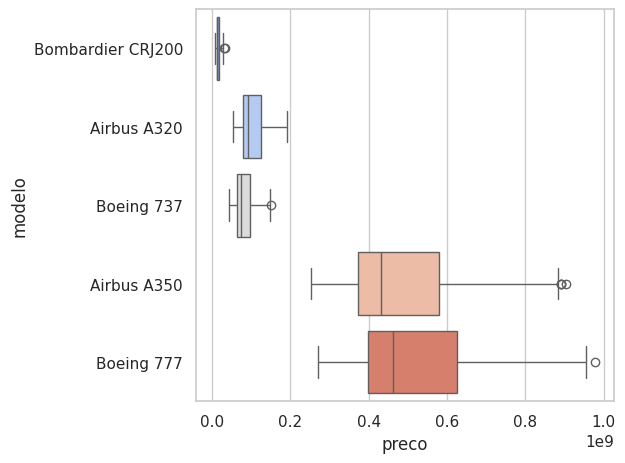

In [799]:

sns.boxplot(data=df_v2, x="preco", y="modelo", hue="modelo", palette="coolwarm")

plt.tight_layout()
plt.show()


Ao manter as mesmas featurs, ainda tendo como y o preço para a predição estatítica, podemos avaliar novamente os modelos para ver o impacto da remoção

In [800]:
x_v2 = df_v2[["ano_fabricacao", "alcance_km", "consumo_combustivel_por_hora"]]
y_v2 = df_v2["preco"]

x_train_v2, x_test_v2, y_train_v2, y_test_v2 = train_test_split(x_v2, y_v2, test_size=0.2, random_state=42)

In [801]:
mae_antes = [predLinearRegression(x_test, y_test)[1], predRandomForestRegressor(x_test, y_test)[1], predDecisionTreeRegressor(x_test, y_test)[1]]
mae_depois = [predLinearRegression(x_test_v2, y_test_v2)[1], predRandomForestRegressor(x_test_v2, y_test_v2)[1], predDecisionTreeRegressor(x_test_v2, y_test_v2)[1]]

mse_antes = [predLinearRegression(x_test, y_test)[2], predRandomForestRegressor(x_test, y_test)[2], predDecisionTreeRegressor(x_test, y_test)[2]]
mse_depois = [predLinearRegression(x_test_v2, y_test_v2)[2], predRandomForestRegressor(x_test_v2, y_test_v2)[2], predDecisionTreeRegressor(x_test_v2, y_test_v2)[2]]

r2_antes = [predLinearRegression(x_test, y_test)[3], predRandomForestRegressor(x_test, y_test)[3], predDecisionTreeRegressor(x_test, y_test)[3]]
r2_depois = [predLinearRegression(x_test_v2, y_test_v2)[3], predRandomForestRegressor(x_test_v2, y_test_v2)[3], predDecisionTreeRegressor(x_test_v2, y_test_v2)[3]]

rmse_antes = [predLinearRegression(x_test, y_test)[4], predRandomForestRegressor(x_test, y_test)[4], predDecisionTreeRegressor(x_test, y_test)[4]]
rmse_depois = [predLinearRegression(x_test_v2, y_test_v2)[4], predRandomForestRegressor(x_test_v2, y_test_v2)[4], predDecisionTreeRegressor(x_test_v2, y_test_v2)[4]]


In [802]:
metrics = ["MAE", "MSE", "R²", "RMSE"]
values_antes = [mae_antes, mse_antes, r2_antes, rmse_antes]
values_depois =  [mae_depois, mse_depois, r2_depois, rmse_depois]

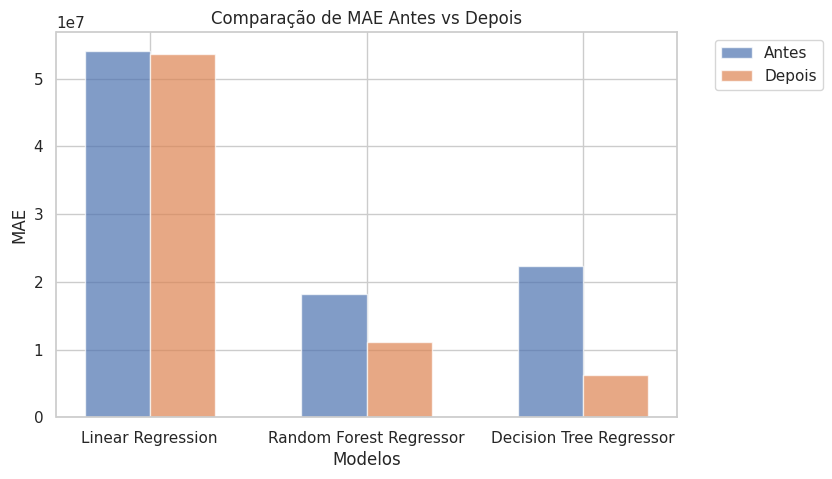

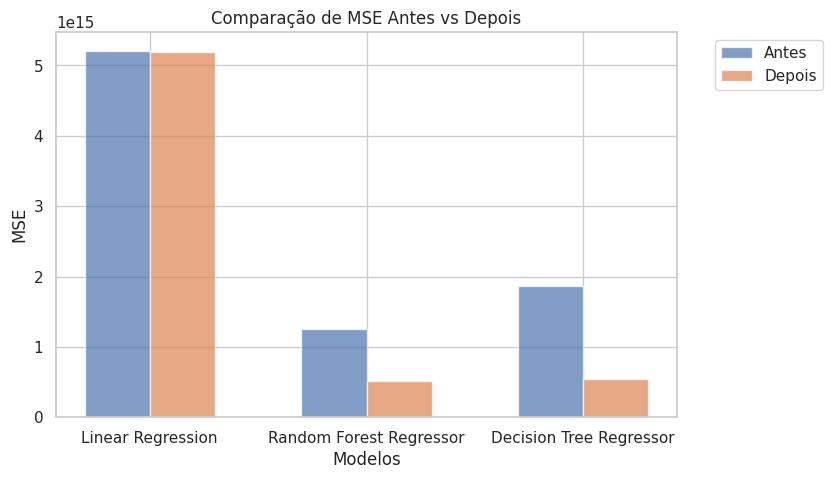

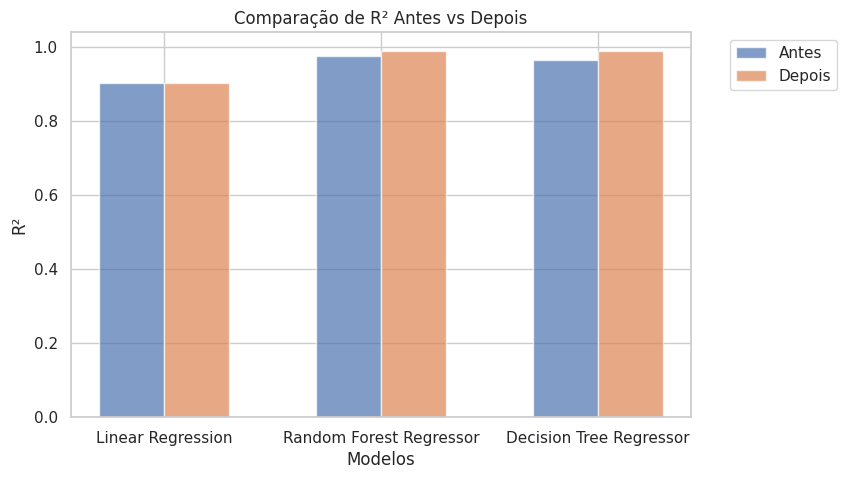

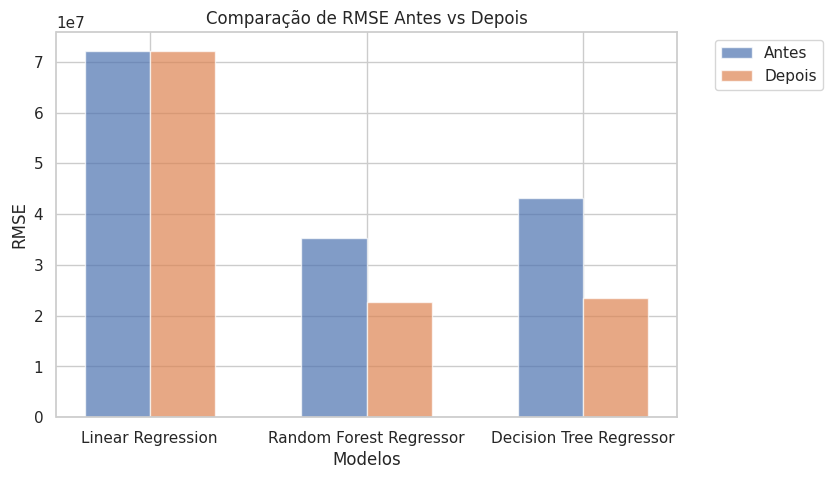

In [803]:
modelos= ["Linear Regression", "Random Forest Regressor","Decision Tree Regressor"]
x_bar = np.arange(len(modelos))
width = 0.3

for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    plt.bar(x_bar- width/2, values_antes[i], width, label="Antes", alpha=0.7)
    plt.bar(x_bar + width/2, values_depois[i], width, label="Depois", alpha=0.7)
    plt.title(f"Comparação de {metric} Antes vs Depois")
    plt.xlabel("Modelos")
    plt.ylabel(metric)
    plt.xticks(x_bar, modelos)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [804]:
modelo_rf_v2 = train_RandomForestRegressor(x_train_v2, y_train_v2, x_test_v2, y_test_v2)


score - Random Forest: 0.9718167840146897


In [805]:
cliente_Joao_da_Silva_v2 = pd.DataFrame({"ano_fabricacao":[2021],"alcance_km":[max(df["alcance_km"])],
                                       "consumo_combustivel_por_hora":[min(df["consumo_combustivel_por_hora"])]})
previsao_preco = modelo_rf.predict(cliente_Joao_da_Silva)
print(f"Previsão de preço estimado de compra: {previsao_preco[0]:,.2f}")

Previsão de preço estimado de compra: 806,707,369.00
